# Setup

In [1]:
import os
from collections import defaultdict

import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from IPython.display import display

%matplotlib inline

DIR = r'c://downloads'

plt.style.use('ggplot')

# Q1

In [2]:
raw_datasets = pd.read_csv(os.path.join(DIR, 'mysterious_samples.csv'))
display(raw_datasets)

,dataset,x,y
0,1,10,8.04
1,1,8,6.95
2,1,13,7.58
3,1,9,8.81
4,1,11,8.33
5,1,14,9.96
6,1,6,7.24
7,1,4,4.26
8,1,12,10.84
9,1,7,4.82


In [3]:
datasets = [raw_datasets[raw_datasets['dataset'] == i + 1].drop(columns = ['dataset']).reset_index(drop = True) \
        for i in range(4)]

for i, dataset in enumerate(datasets):
    print('Dataset %d:' % (i + 1))
    display(dataset)

Dataset 1:


,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


Dataset 2:


,x,y
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


Dataset 3:


,x,y
0,10,7.46
1,8,6.77
2,13,12.74
3,9,7.11
4,11,7.81
5,14,8.84
6,6,6.08
7,4,5.39
8,12,8.15
9,7,6.42


Dataset 4:


,x,y
0,8,6.58
1,8,5.76
2,8,7.71
3,8,8.84
4,8,8.47
5,8,7.04
6,8,5.25
7,19,12.50
8,8,5.56
9,8,7.91


# Q1A

In [4]:
for i, dataset in enumerate(datasets):
    print('Pearson\'s correlation for dataset %d: r = %.2f, p = %.2g' % ((i + 1,) + pearsonr(dataset['x'], dataset['y'])))

Pearson's correlation for dataset 1: r = 0.82, p = 0.0022
Pearson's correlation for dataset 2: r = 0.82, p = 0.0022
Pearson's correlation for dataset 3: r = 0.82, p = 0.0022
Pearson's correlation for dataset 4: r = 0.82, p = 0.0022


The four datasets have the same Pearson's correlation coefficient (r = 0.82), with a quite significant p-value (~2E-03), suggesting potential correlation between the two variables across all 4 datasets. However, we need to inspect the data further to make more reliable claims.

# Q1B+C

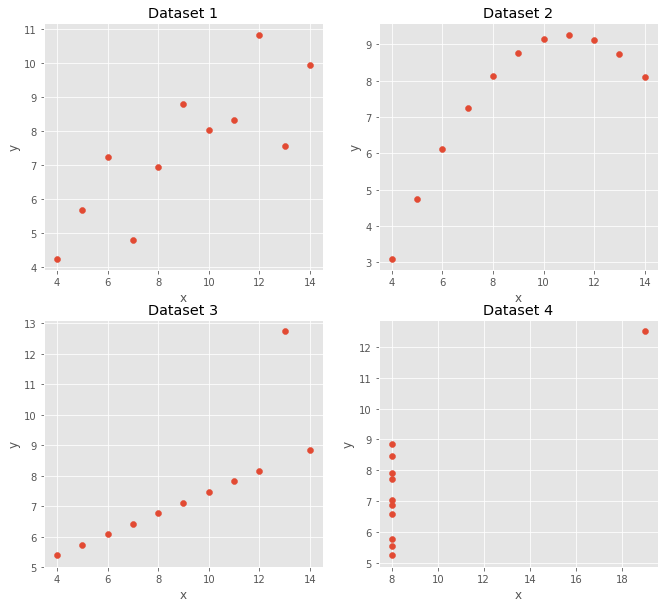

In [5]:
fig, axes = plt.subplots(figsize = (11, 10), nrows = 2, ncols = 2)

for i, (dataset, ax) in enumerate(zip(datasets, axes.flatten())):
    ax.scatter(dataset['x'], dataset['y'])
    ax.set_title('Dataset %d' % (i + 1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

Now that we have visualized the four datasets, we can see that something totally different is going on in each of them:

**Dataset 1** shows genuine (though imperefect and noisy) correlation between the two variables. Pearson's correlation is an appropriate tool to use in such a dataset, and its results (r = 0.82, p = 0.0022) reflect the true relationship between the two variables.

**Dataset 2** also shows true association, but here a linear relationship (captured by Pearson's correlation) doesn't seem like the most appropriate way to describe this association. The relationship between x and y appears to follow a simple parabola formula. A polynomial regression (of degree 2) would decsribe the relationship between x and y much better in this case. Nonetheless, Pearon's correlation provides valid results.

In **dataset 3**, on the other hand, we have a clear case of an outlier. Here we have a perfect linear correlation in all data points, except the single outlier. It is advised to remove the outlier in such cases (and obtaining a Pearon's correlation coefficient close to 1, which would better describe the association in this case).

In **dataset 4** we also have an outlier, but here it causes the opposite effect. If we removed the outlier from the analysis, we wouldn't get any signficant correlation. In other words, the correlation in this case appears to be totally bogus. It is not appropriate to use Pearson's correlation on the raw dataset (without first removing the outlier).

# Q1D

This analysis demonstrates that the statement “numerical calculations are exact, but graphs are rough” is clearly wrongheaded. If not for graphs, we would have clearly been drawn to wrong conclusions here. Before we actually looked at the data (and could only rely on statistical test results such as Pearon's correlation) we got the wrong impression that the 4 datasets bahaved similarly. We were effectively blind to crucial differences between them.

Both numerical/statistical calculations and graphs don't tell the full story. Combine the two of them together and you are less likely to get things wrong.

This exercise is based on an artificial dataset, known as the [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), that was constructed in 1973 by the English statistician Francis Anscombe exactly for teaching that lesson.

# Q2

In [6]:
'''
Parsing the TiGER database.
'''

refseqs = []
tissues = []

# From: http://bioinfo.wilmer.jhu.edu/tiger/download/ref2tissue-Table.txt
with open(os.path.join(DIR, 'ref2tissue-Table.txt'), 'r') as f:
    
    f.readline()
    
    for line in f:
        
        line_parts = line.strip().split('\t')
        refseq = line_parts[0]
        
        for tissue in line_parts[1:]:
            refseqs.append(refseq)
            tissues.append(tissue)
        
tissue_expression = pd.DataFrame({'refseq': refseqs, 'tissue': tissues})
print('Parsed %d gene-tissue pairs (%d unique genes, %d unique tissues).' % (len(tissue_expression), \
        len(tissue_expression['refseq'].unique()), len(tissue_expression['tissue'].unique())))
display(tissue_expression.head())

Parsed 8529 gene-tissue pairs (7261 unique genes, 30 unique tissues).


,refseq,tissue
0,NM_033169,bladder
1,NM_000253,liver
2,NM_000253,small_intestine
3,NM_033168,bladder
4,NM_000252,liver


In [7]:
tissue_to_refseq_genes = defaultdict(set)

for _, (refseq, tissue) in tissue_expression[['refseq', 'tissue']].iterrows():
    tissue_to_refseq_genes[tissue].add(refseq)
    
unique_tissues = sorted(tissue_to_refseq_genes.keys())
n_tissues = len(unique_tissues)

# Q2A

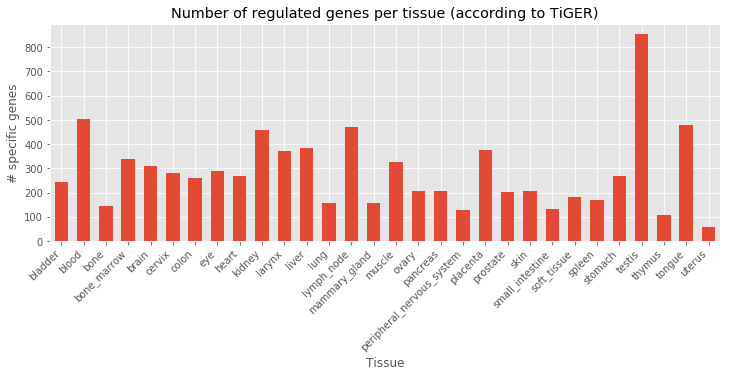

In [8]:
n_genes_per_tissue = [len(tissue_to_refseq_genes[tissue]) for tissue in unique_tissues]

fig, ax = plt.subplots(figsize = (12, 4))
x_positions = np.arange(n_tissues)
ax.bar(x_positions, n_genes_per_tissue, width = 0.6)
ax.set_xticks(x_positions)
ax.set_xticklabels(unique_tissues, rotation = 45, horizontalalignment = 'right')
ax.set_xlim(-0.5, n_tissues - 0.5)
ax.set_xlabel('Tissue')
ax.set_ylabel('# specific genes')
_ = ax.set_title('Number of regulated genes per tissue (according to TiGER)')

Accordig to this plot, the testis has the highest number of reported genes.

# Q2B

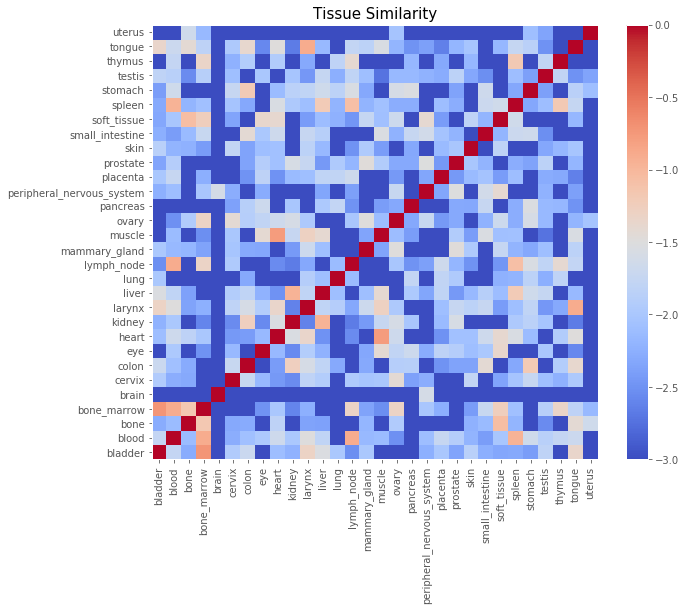

In [9]:
# Because of the use of log-scale, the values in the similarity matrix will go all the way down to -infinity, so we need to
# cut it at some point.
MIN_VALUE = -3

similarity_matrix = np.empty((n_tissues, n_tissues))

for i, tissue_i in enumerate(unique_tissues):
    for j, tissue_j in enumerate(unique_tissues):
        
        genes_i = tissue_to_refseq_genes[tissue_i]
        genes_j = tissue_to_refseq_genes[tissue_j]
        N_i = len(genes_i)
        N_j = len(genes_j)
        N_ij = len(genes_i & genes_j)
        
        with np.errstate(divide = 'ignore'):
            similarity_matrix[i, j] = np.log10(N_ij / np.sqrt(N_i * N_j))
        
similarity_matrix[similarity_matrix <= MIN_VALUE] = MIN_VALUE
fig, ax = plt.subplots(figsize = (10, 8))
heatmap = ax.pcolor(similarity_matrix, cmap = 'coolwarm', vmin = MIN_VALUE, vmax = 0)
fig.colorbar(heatmap)

ax.set_xticks(np.arange(n_tissues) + 0.5)
ax.set_xticklabels(unique_tissues, rotation = 'vertical')
ax.set_yticks(np.arange(n_tissues) + 0.5)
ax.set_yticklabels(unique_tissues)

_ = ax.set_title('Tissue Similarity', fontsize = 15)

According to the heatmap, the brain appears to be the most isolated tissue, with only one other tissue (peripheral nervous system) showing a similarity score higher than the minimal one.

The heart appears most similar to muscle, larynx and "soft tissue". The similarity of the heart to muscle makes sense, as the heart is, in the end, mostly a muscle. This could also partially explain the similarity of the heart to the larynx (which, depending on how exactly it's defined, also contains muscles). The term "soft tissue" is quite generic, and can very well encapsulate many of the heart's componenets, so that similarity isn't too surprising either.